시점 요소가 있는 데이터는 시계열 형태로 표현할 수 있다

선그래프 형태인 연속형과 막대그래프 형태인 분절형으로 구분할 수 있다

선그래프는 시간 간격의 밀도가 높을 때 사용한다

하지만 데이터의 양이 너무 많거나 변동이 심하면 트렌드나 패턴을 사용하는 것이 어려울 수 있다

이러한 경우 추세선을 삽입하여 들쭉날쭉한 데이터 흐름을 안정된 선으로 표현할 수 있다

추세선을 그리는 가장 일반적인 방법은 이동평균방법을 사용하는 것이다

데이터의 연속적 그룹의 평균을 구하는 것이다

분절형 시간 시각화의 경우 막대그래프, 누적 막대그래프, 점 그래프 등으로 표현한다

1년 동안의 월 간격 단위 흐름과 같이 시간의 밀도가 낮은 경우에 활용하기 좋은 방법이다

분절형 시각화는 값들의 상대적 차이를 나타내는 것에 유리하다

또한 막대에 색상을 표현하여 특정 시점에 대한 정보를 추가할 수 있다

1. 패키지 임포트

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

2. 데이터 불러오기

In [15]:
df = pd.read_csv('/content/train.csv')

3. 데이터 샘플 확인

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


4. 선그래프 시각화를 위한 데이터 가공

In [25]:
# 날짜 칼럼의 형식을 변환합니다. 이 경우 'dayfirst=True'를 사용하여 날짜가 월보다 먼저 오는 것을 명시합니다.
df['Date2'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# 날짜를 오름차순으로 정렬합니다.
df = df.sort_values(by='Date2')

# 연도 칼럼을 생성합니다.
df['Year'] = df['Date2'].dt.year

# 2018년 데이터만 필터링합니다.
df_line = df[df.year == 2018]

# 2018년 일별 매출액을 가공합니다.
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

# 결과를 확인합니다.
df_line.head()

,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


5. 선그래프 시각화

<Axes: xlabel='Date2'>

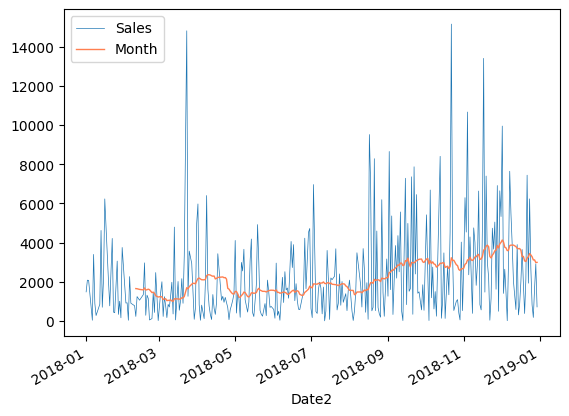

In [26]:
#30일 이동평균 생성
df_line['Month'] = df_line["Sales"].rolling(window=30).mean() #30일 이동평균선을 삽입하기 위해 rolling()함수를 사용하여 Month칼럼을 새로 만들어 준다
                                                              #매출액 편차가 커서 일 매출 선으로는 전체적인 추이를 가늠하기 힘들기 때문에 이동평균선이 도움이 된다.

#선그래프 시각화
ax = df_line.plot(x='Date2', y='Sales', linewidth = '0.5')
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth = '1', ax=ax)

6. 막대그래프 시각화를 위한 데이터 가공

In [27]:
#연도별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()

df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


7. 막대그래프 시각화

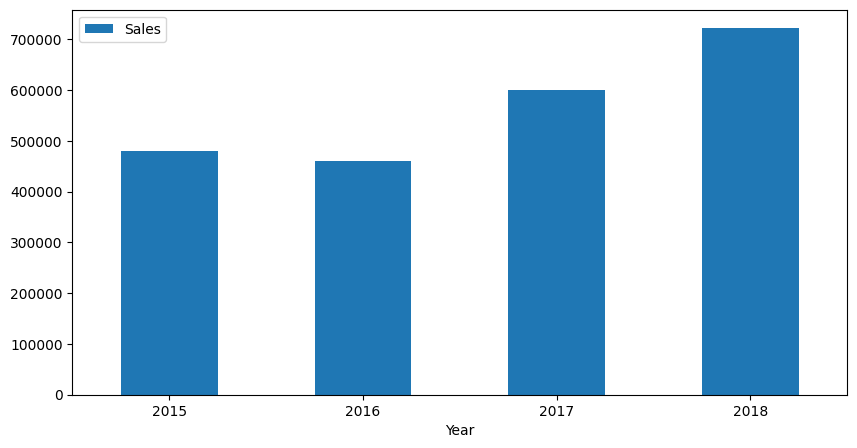

In [28]:
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot = 0, figsize = (10,5))  #rot옵션은 x축 레이블 이름의 기울기이다

8. 누적막대그래프 시각화를 위한 데이터 가공

In [29]:
df_bar_2 = df.groupby(['Year','Segment'])['Sales'].sum().reset_index()

df_bar_2_pv = df_bar_2.pivot(index = 'Year',
                             columns = 'Segment',
                             values = 'Sales').reset_index()

df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


9. 누적 막대그래프 시각화를 위한 데이터 가공

<Axes: xlabel='Year'>

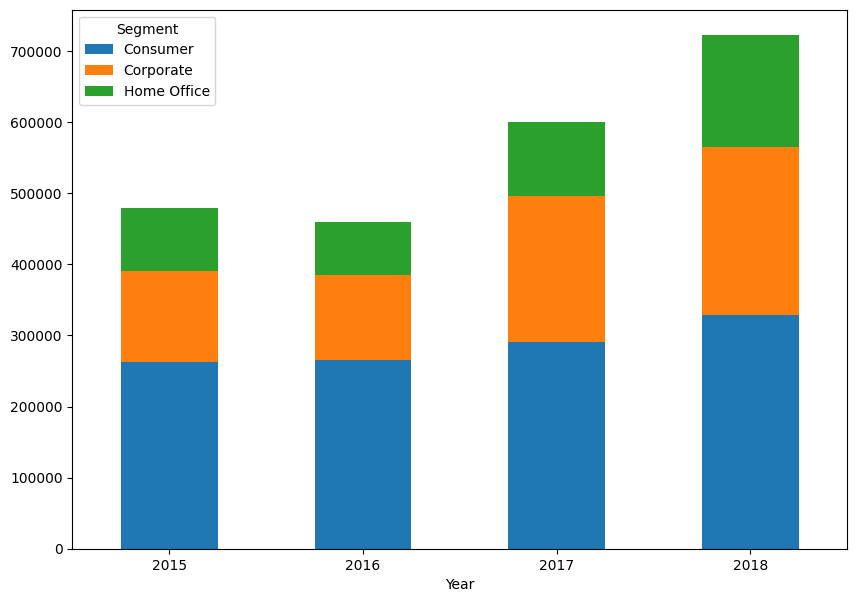

In [32]:
df_bar_2_pv.plot.bar(x='Year',stacked=True,rot=0,figsize=(10,7)) #stacked는 누적 그래프로 그린다는 의미 만약 False로 설정하면 연도별로 3개씩 그래프가 나오게 됨